In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [121]:
#read in data
data = pd.read_csv('weball06.csv', header = None)

#create column names
column_names = ['CAND_ID', 'CAND_NAME', 'CAND_ICI', 'PTY_CD', 'CAND_PTY_AFFILIATION', 'TTL_RECEIPTS', 'TRANS_FROM_AUTH',
                                              'TTL_DISB', 'TRANS_TO_AUTH', 'COH_BOP', 'COH_COP', 'CAND_CONTRIB', 'CAND_LOANS', 'OTHER_LOANS', 'CAND_LOAN_REPAY',
                                              'OTHER_LOAN_REPAY', 'DEBTS_OWED_BY', 'TTL_INDIV_CONTRIB', 'CAND_OFFICE_ST', 'CAND_OFFICE_DISTRICT', 'SPEC_ELECTION',
                                              'PRIM_ELECTION', 'RUN_ELECTION', 'GEN_ELECTION', 'GEN_ELECTION_PERCENT', 'OTHER_POL_CMTE_CONTRIB', 'POL_PTY_CONTRIB',
                                              'CVG_END_DT', 'INDIV_REFUNDS', 'CMTE_REFUNDS']
data.columns = column_names

#convert any lowercase to uppercase
data['CAND_PTY_AFFILIATION'] = data['CAND_PTY_AFFILIATION'].str.upper()
data['SPEC_ELECTION'] = data['SPEC_ELECTION'].str.upper()
data['PRIM_ELECTION'] = data['PRIM_ELECTION'].str.upper()
data['RUN_ELECTION'] = data['RUN_ELECTION'].str.upper()
data['GEN_ELECTION'] = data['GEN_ELECTION'].str.upper()


data


CAND_ID                   CAND_NAME CAND_ICI  PTY_CD  \
0     H6AK00136         VONDERSAAR, FRANK J        C       1   
1     H6AK00144             BENSON, DIANE E        C       1   
2     H6AK00045             YOUNG, DONALD E        I       2   
3     H2AL01119           BELK, JUDY MCCAIN        C       1   
4     H6AL01052  BECKERLE, VIVIAN SHEFFIELD        C       1   
...         ...                         ...      ...     ...   
2405  S6WV00071      JOHNSON, GEORGE DARWIN        C       2   
2406  S6WV00089        SNUFFER, RICHARD RAY        C       2   
2407  S6WY00183            GROUTAGE, F DALE        C       1   
2408  S4WY00055               THOMAS, CRAIG        I       2   
2409  S6WY00126             ENZI, MICHAEL B        I       2   

     CAND_PTY_AFFILIATION  TTL_RECEIPTS  TRANS_FROM_AUTH    TTL_DISB  \
0                     DEM       1092.00              0.0     1091.00   
1                     DEM     198951.60              0.0   192486.89   
2                     REP    1919786.62              0.0  1959811.40   
3                     DEM        200.00              0.0      534.28   
4                     DEM      16746.00              0.0    13482.00   
...                   ...           ...              ...         ...   
2405                  REP      40355.00              0.0    40355.00   
2406                  REP       7090.00              0.0     5173.00   
2407                  DEM     141899.00              0.0   141164.00   
2408                  REP    1622792.00         100334.0  1392057.00   
2409                  REP     510958.00              0.0   526930.00   

      TRANS_TO_AUTH     COH_BOP  ...  SPEC_ELECTION  PRIM_ELECTION  \
0               0.0        0.00  ...            NaN              L   
1               0.0        0.00  ...            NaN              W   
2          231000.0  1898567.49  ...            NaN              W   
3               0.0      438.60  ...            NaN            NaN   
4               0.0        0.00  ...            NaN              W   
...             ...         ...  ...            ...            ...   
2405            0.0        0.00  ...            NaN            NaN   
2406            0.0        0.00  ...            NaN              L   
2407            0.0        0.00  ...            NaN              W   
2408       150600.0   386343.00  ...            NaN              W   
2409          500.0   199041.00  ...            NaN            NaN   

      RUN_ELECTION  GEN_ELECTION  GEN_ELECTION_PERCENT  \
0              NaN           NaN                   NaN   
1              NaN             L                  67.0   
2              NaN             W                  94.0   
3              NaN           NaN                   NaN   
4              NaN             L                  31.0   
...            ...           ...                   ...   
2405           NaN           NaN                   NaN   
2406           NaN           NaN                   NaN   
2407           NaN             L                  29.0   
2408           NaN             W                  70.0   
2409           NaN           NaN                   NaN   

      OTHER_POL_CMTE_CONTRIB  POL_PTY_CONTRIB  CVG_END_DT INDIV_REFUNDS  \
0                       0.00              0.0  08/23/2006           0.0   
1                       0.00          10000.0  12/31/2006        1000.0   
2                  707822.26             98.0  12/31/2006        4200.0   
3                       0.00              0.0  12/31/2006           0.0   
4                    2500.00           2300.0  10/18/2006           0.0   
...                      ...              ...         ...           ...   
2405                    0.00              0.0  09/30/2006           0.0   
2406                    0.00              0.0  04/19/2006           0.0   
2407                 5000.00              0.0  12/04/2006           0.0   
2408               977474.00            115.0  12/31/2006        2500.0   
2409       

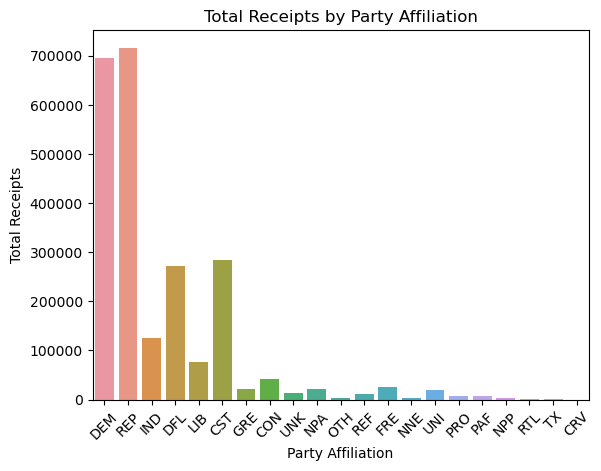

In [122]:
#Show difference between party affiliation and total receipts
barplot = sns.barplot(x = 'CAND_PTY_AFFILIATION', y = 'TTL_RECEIPTS', data = data, errorbar = None, order = data.groupby('CAND_PTY_AFFILIATION').TTL_RECEIPTS.sum().sort_values(ascending = False).index)
barplot.set(xlabel = 'Party Affiliation', ylabel = 'Total Receipts', title = 'Total Receipts by Party Affiliation')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 45)
plt.show()


Republicans and Democrats clearly have the highest amount of money donated. Followed by the Constitution party and the Democratic-Farmer-Labor party.

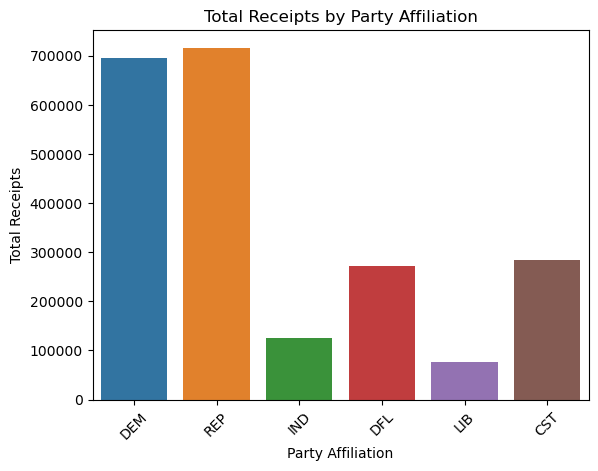

In [123]:
#Create database with political parties DEM, REP, IND, DFL, LIB, CST
split_data = data[data['CAND_PTY_AFFILIATION'].isin(['DEM', 'REP', 'IND', 'DFL', 'LIB', 'CST'])]

#New bar plot
plot = sns.barplot(x = 'CAND_PTY_AFFILIATION', y = 'TTL_RECEIPTS', data = split_data, errorbar = None, order = split_data.groupby('CAND_PTY_AFFILIATION').TTL_RECEIPTS.sum().sort_values(ascending = False).index)
plot.set(xlabel = 'Party Affiliation', ylabel = 'Total Receipts', title = 'Total Receipts by Party Affiliation')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
plt.show()


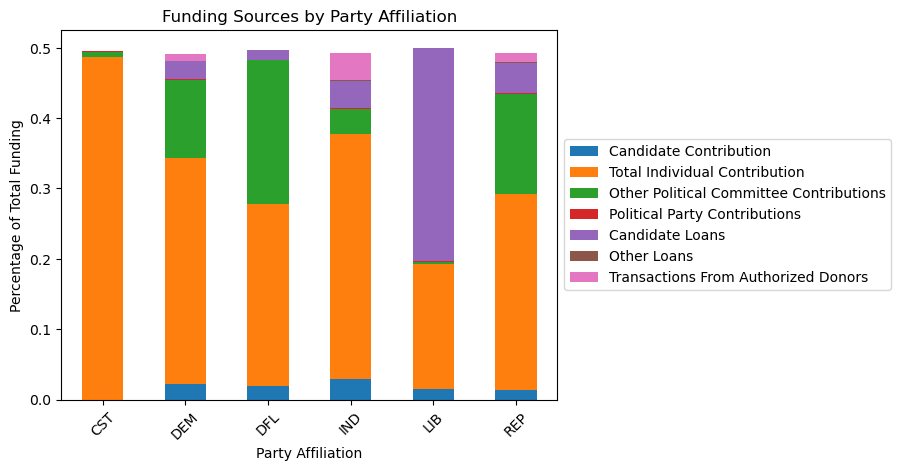

In [124]:
#Let's look at where the money is coming from for each party
party_funding = split_data.groupby('CAND_PTY_AFFILIATION')[['TTL_RECEIPTS', 'CAND_CONTRIB', 'TTL_INDIV_CONTRIB', 'OTHER_POL_CMTE_CONTRIB', 'POL_PTY_CONTRIB', 'CAND_LOANS', 'OTHER_LOANS', 'TRANS_FROM_AUTH']].sum()

#Normalized
party_funding_norm = party_funding.div(party_funding.sum(axis=1), axis=0)
part_funding_norm = party_funding_norm.reindex(['DEM', 'REP', 'IND', 'DFL', 'LIB', 'CST'])
party_funding_norm

#Plot without total receipts
plot = party_funding_norm.drop('TTL_RECEIPTS', axis = 1).plot(kind = 'bar', stacked = True, title = 'Funding Sources by Party Affiliation')
plot.set(xlabel = 'Party Affiliation', ylabel = 'Percentage of Total Funding')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
plt.legend(loc='center left', labels = ['Candidate Contribution', 'Total Individual Contribution', 'Other Political Committee Contributions',
                                        'Political Party Contributions', 'Candidate Loans', 'Other Loans', 'Transactions From Authorized Donors'],bbox_to_anchor=(1.0, 0.5))
plt.show()



Shows where the money is coming from for the parties. Most campaigns seem to be heavily reliant on contributions from the individual. With the exception of the libertarian party, where candidates seem to get a lot of money from loans. 

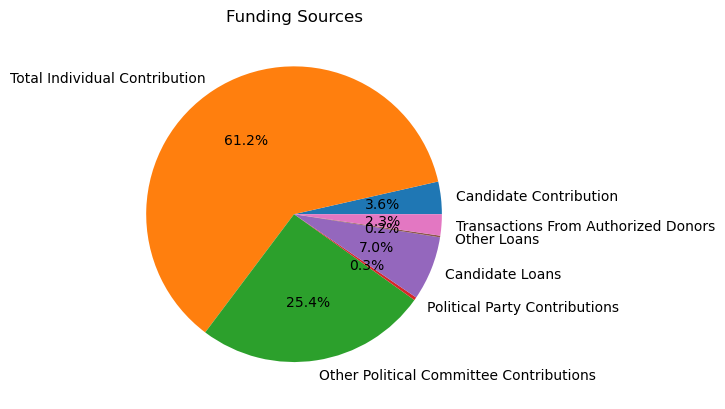

In [125]:
funding_sources = split_data[['TTL_RECEIPTS', 'CAND_CONTRIB', 'TTL_INDIV_CONTRIB', 'OTHER_POL_CMTE_CONTRIB', 'POL_PTY_CONTRIB', 'CAND_LOANS', 'OTHER_LOANS', 'TRANS_FROM_AUTH']].sum()

#pie chart without total receipts
funding_sources.drop(['TTL_RECEIPTS']).plot(kind = 'pie', autopct = '%1.1f%%', title = 'Funding Sources', labels = ['Candidate Contribution', 'Total Individual Contribution', 'Other Political Committee Contributions',
                                                                                                                    'Political Party Contributions', 'Candidate Loans', 'Other Loans', 'Transactions From Authorized Donors'], legend = False)
plt.show()

This is the breakdown across all the parties just to be able to compare. Most of the parties we looked at follow this at least a little. Individual contribution drives most campaigns. As a society the people do have power when it comes to candidates and it's more than we might think. I know a lot of people look at candidates receiving millions from super PACs but the individual is still the most important financial asset to a candidates campaign. 

In [126]:
#data set just of people who either won or lost
general = data[data['GEN_ELECTION'].isin(['W', 'L'])]

#Analyze if total receipts is a good predictor of winning General election
#Create new column with 1 for win and 0 for loss
general.loc[:, 'Win'] = np.where(general['GEN_ELECTION'] == 'W', 1, 0)

Y = general['Win']
X = general['TTL_RECEIPTS']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#Standardize data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values.reshape(-1,1))
X_test = scaler.transform(X_test.values.reshape(-1,1))

#Fit model
model = LogisticRegression()
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Performance metrics
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.55      0.83      0.66        88
           1       0.72      0.39      0.51        99

    accuracy                           0.60       187
   macro avg       0.64      0.61      0.59       187
weighted avg       0.64      0.60      0.58       187

[[73 15]
 [60 39]]


/var/folders/1l/2ckbcc5d3rqbr5zyszgwt2wm0000gn/T/ipykernel_98730/3748408057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general.loc[:, 'Win'] = np.where(general['GEN_ELECTION'] == 'W', 1, 0)


I wanted to explore whether or not the total receipts had an effect on whether or not a candidate won the primary election. I ran a logistic model to see if total funds did indeed have an impact on winning. Class 0 has a higher recall when compared to Class 1 which that total receipts is a better predictor of a candidate losing when they have less total receipts. This could indicate that the less receipts a candidate has the more likely they are to lose. The lower recall for Class 1 could indicate that total receipts isn't a guarantee that a candidate will win. However there is a high precision rate when predicting wins which means when the model predicts a win, that prediction is more reliable which could indicate that above a certain threshold of total receipts the probability of winning increases. The model accuracy is 60% which is semi-strong but there are likely other factors that contribute to candidate success as well. 

It's important to note that this is not measuring causation of the two variables. A candidate with lower funding could also just be an unpopular candidate who gets less funding and loses because of that, and on the other hand, a candidate with high funding could just be more popular, and gets more funding and wins because of that. There are also numerous other factors that goes into a candidates level of funding and whether or not a candidate wins that this model does not capture. 

AUC: 0.815


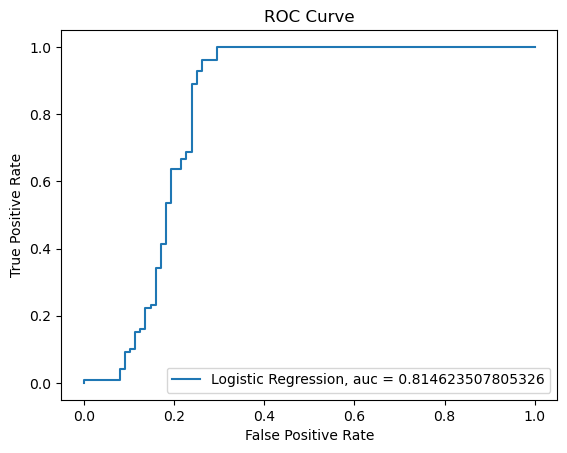

In [127]:
#AUC-ROC Score
y_pred_prob = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC: %.3f' % auc)

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Logistic Regression, auc = ' + str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 4)
plt.show()



This ROC Curve and the AUC score indicate that this model is a pretty good predictor of differentiator between winning and losing. This just means that using a logistic model in this case makes sense. 